<a href="https://colab.research.google.com/github/ajitjadhav10/UMBC/blob/main/DATA%20690%20NLP/Copy_of_DATA_690_NLP_HW_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
import nltk
import requests

warnings.filterwarnings(action = 'ignore') 
  
import gensim 
from gensim.models import Word2Vec 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data= requests.get('https://raw.githubusercontent.com/ajitjadhav10/UMBC/main/DATA%20690%20NLP/Data%20files/Europe_Covid.txt')
data_1 = data.text
print(data_1)

European countries are reporting record numbers of Covid-19 cases as the continent prepares for the pandemic to intensify through winter.Those affected include Europe's political class. Polish President Andrzej Duda tested positive for Covid-19 on Friday, according to a tweet from Presidential Minister Blazej Spychalski Saturday. Duda said that he was feeling well, was asymptomatic and would continue working in isolation. "As you can see, I am full of strength. I hope it will stay this way. However, the fact is that I must isolate. Together with my wife, we abide by the rules of isolation in an iron manner," he said in a video posted on Twitter on Saturday. "I would like to apologize to all of those, who have to go through quarantine procedures in connection to meeting with me in recent days ... I hope none of you get sick." The Polish President used the video to appeal to people to be especially careful of senior citizens, as they were particularly at risk from Covid-19. Duda's diagno

In [ ]:
f = data_1.replace("\n", " ") 
  
data = [] 

In [ ]:
data

[]

In [ ]:
for i in sent_tokenize(f): 
    temp = [] 
      
    # tokenize the sentence into words 
    for j in word_tokenize(i): 
        temp.append(j.lower()) 
  
    data.append(temp) 
  
#Create CBOW model 
model1 = gensim.models.Word2Vec(data, min_count = 1, size = 50, window = 3, sg=1) 

In [ ]:
model1['curfew']

array([ 0.007595  , -0.00397868, -0.00883239,  0.00108755, -0.00157396,
       -0.00909097, -0.00704709, -0.00201391, -0.0104248 , -0.00732185,
       -0.00456631,  0.00209347, -0.00031774,  0.00689092, -0.00179247,
       -0.00639461,  0.00977521, -0.0090615 , -0.00770078,  0.00847176,
       -0.0051026 ,  0.00507147,  0.00203918, -0.00979044,  0.00563144,
        0.00818802, -0.00833808, -0.00534257,  0.00571399,  0.00851309,
       -0.00218699,  0.00925179,  0.00853053, -0.00292128,  0.00691996,
        0.00525374, -0.00145778,  0.00533196,  0.00316687, -0.00581673,
        0.00221389,  0.00562891,  0.00671689, -0.00016445, -0.00226683,
        0.0086548 ,  0.00980713,  0.00828389,  0.00274799, -0.00371117],
      dtype=float32)

In [ ]:
model1['government']

array([ 6.2120426e-03, -8.8440068e-03, -6.8814205e-03, -1.3750417e-03,
       -8.6061827e-06,  2.2936359e-03,  1.7514110e-03,  8.7438570e-03,
       -4.5194225e-03, -3.9052430e-03, -8.2654608e-03, -5.1922584e-04,
        6.4283358e-03, -1.0717228e-03,  3.3231443e-03,  1.5869734e-03,
       -7.6144855e-03,  8.8316873e-03,  5.1486501e-03,  4.6612709e-03,
       -7.1502724e-03,  8.8601280e-03,  1.0450450e-02,  1.0045275e-04,
       -2.1940342e-03, -6.3340127e-04, -4.0631604e-04,  2.8046297e-03,
       -8.9242561e-03,  1.2031816e-03,  1.9385339e-03, -5.6358455e-03,
        6.3119613e-04,  5.1140683e-05,  7.2996011e-03,  2.6375952e-03,
       -5.5866670e-03, -7.2979159e-04,  9.2686480e-03, -5.5594314e-03,
       -4.1201357e-03,  9.9491980e-03,  4.8511662e-03,  1.1900308e-03,
       -3.9804550e-03,  2.6844272e-03,  7.1936648e-04, -5.2770530e-03,
       -8.4515186e-03,  2.1912107e-05], dtype=float32)

In [ ]:
model1.similarity('curfew', 'government') 

0.10944014

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def extract_text_similarity_jaccard(text1, text2):
    """
    This method will return Jaccard similarity between two texts
    after lemmatizing them.
    :param text1: text1
    :param text2: text2
    :return: similarity measure
    """
    lemmatizer = WordNetLemmatizer()
    words_text1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(text1)]
    words_text2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(text2)]
    nr = len(set(words_text1).intersection(set(words_text2)))
    dr = len(set(words_text1).union(set(words_text2)))
    jaccard_sim = nr / dr
    return jaccard_sim

In [ ]:
pair1 = ["What you do defines you","Your deeds define you"]
pair2 = ["Once upon a time there lived a king.", "Who is your queen?"]
pair3 = ["He is desperate", "Is he not desperate?"]

In [ ]:
extract_text_similarity_jaccard(pair1[0],pair1[1])

0.14285714285714285

In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
sid.polarity_scores(data_1)

{'neg': 0.039, 'neu': 0.911, 'pos': 0.05, 'compound': 0.4691}

In [ ]:
from textblob import TextBlob

In [ ]:
blob = TextBlob(data_1)

In [ ]:
print (blob)
blob.sentiment

European countries are reporting record numbers of Covid-19 cases as the continent prepares for the pandemic to intensify through winter.Those affected include Europe's political class. Polish President Andrzej Duda tested positive for Covid-19 on Friday, according to a tweet from Presidential Minister Blazej Spychalski Saturday. Duda said that he was feeling well, was asymptomatic and would continue working in isolation. "As you can see, I am full of strength. I hope it will stay this way. However, the fact is that I must isolate. Together with my wife, we abide by the rules of isolation in an iron manner," he said in a video posted on Twitter on Saturday. "I would like to apologize to all of those, who have to go through quarantine procedures in connection to meeting with me in recent days ... I hope none of you get sick." The Polish President used the video to appeal to people to be especially careful of senior citizens, as they were particularly at risk from Covid-19. Duda's diagno

Sentiment(polarity=0.04992382294707877, subjectivity=0.3476432095036746)

In [ ]:
# import the wordcloud library
from wordcloud import WordCloud
# Instantiate a new wordcloud.
wordcloud = WordCloud(random_state = 8,
        normalize_plurals = False,
        width = 600, height= 300,
        max_words = 300,
        stopwords = [])
# Apply the wordcloud to the text.
wordcloud.generate(data_1)

(-0.5, 599.5, 299.5, -0.5)

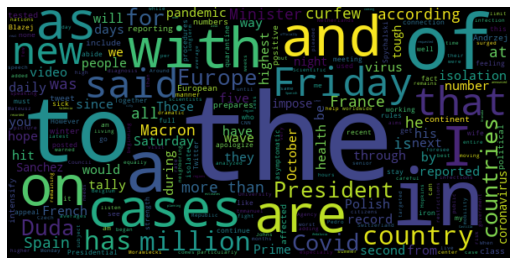

In [ ]:
import matplotlib.pyplot as plt
# create a figure
fig, ax = plt.subplots(1,1, figsize = (9,6))
# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')
# and remove the axis
plt.axis("off")

In [ ]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from gensim.summarization import summarize

In [ ]:
print ('Extractive Summary (250 words)')
print (summarize(data_1, word_count=250))

Extractive Summary (250 words)
European countries are reporting record numbers of Covid-19 cases as the continent prepares for the pandemic to intensify through winter.Those affected include Europe's political class.
Polish President Andrzej Duda tested positive for Covid-19 on Friday, according to a tweet from Presidential Minister Blazej Spychalski Saturday.
Duda's diagnosis comes as the country reported 13,632 new cases Friday, the highest daily tally since the pandemic began.
"The second wave has hit the entire Europe equally," Prime Minister Mateusz Morawiecki said Friday.
The five countries with the highest rate of infection worldwide are all in Europe, according to Johns Hopkins University's latest moving averages, as analyzed by CNN.The worst-hit nations are the Czech Republic, Belgium, the Netherlands, Switzerland and France.In all five countries, the number of new infections has surged since the beginning of October.
French President Emmanuel Macron warned Friday that his cou